In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

import cv2
import numpy as np
import pandas as pd

In [2]:
# simple way to unpack the data from tf directly is
mnist = tf.keras.datasets.mnist # available in here
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# this will directly load the data in train and test

In [3]:
# what we have done here is we have normalize the values between zero and ones
# we do it so that it becomes easier for the network to learn this normalize data
# it is not necessary to do it but it reduces computation power by alot and
# it is considered as a good ethic
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
# axis 1 refers to the column values

In [4]:
print(x_train.shape) # here there are 60k images present of size 28*28 each
print(y_train.shape) # label of those 60k images

(60000, 28, 28)
(60000,)


In [5]:
print(x_test.shape) # here there are 10k test images present of size 28*28 each
print(y_test.shape) # label of those 10k images

(10000, 28, 28)
(10000,)


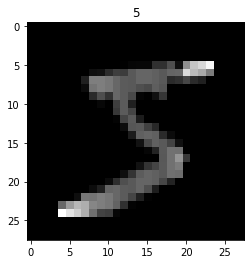

In [6]:
# here the picture of 5 decreased and becomes a little lighter which shows
# that the data has been normalized
plt.imshow(x_train[0],cmap="gray")
plt.title(y_train[0])
plt.show()

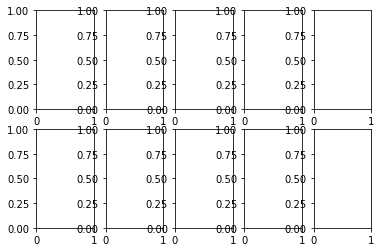

In [7]:
fig , axs = plt.subplots(2,5) 
# generates a single figure and array of azes where subplots will go

In [8]:
axs = axs.flatten() # flatten the array of axes into a single 1-D array

Creating the subplots in python

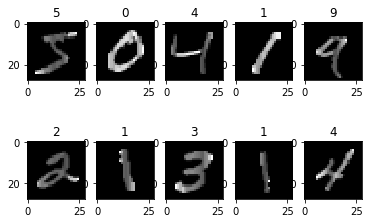

In [9]:
# printing multiple sublplots along with their titles in python code
# this code is important for the visualization part
fig, axs = plt.subplots(2,5) # subplots will be in 2 rows and 5 columns
axs = axs.flatten() # flatten the axis into one single dimension
for lbl,img,ax in zip(y_train[:10],x_train[:10],axs):  # which is number of subplots we want to print
    ax.imshow(img, cmap="gray")
    ax.title.set_text(lbl) # this will set text as label
plt.show() 

In [10]:
# now we will create our deep learning model....
model = tf.keras.models.Sequential()

In [11]:
# we are training our mnist dataset on a simple neural network 
# instead of the convolution network in order to check and predict the result
# of how well it performs
model.add(tf.keras.layers.Flatten())  
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

model.fit(x_train,y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3096 - accuracy: 0.9064
Epoch 2/3
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1776 - accuracy: 0.9460
Epoch 3/3
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1449 - accuracy: 0.9553


In [12]:
predictions = model.predict(x_test)

In [13]:
# our predictions are in terms of probability of each element/number
print(np.argmax(predictions[8])) # argmax will give the one with highest probability
predictions[:10]

5


array([[5.23226799e-06, 6.47112245e-07, 8.83885514e-05, 9.70471683e-06,
        1.44175135e-06, 1.90107289e-06, 1.78270113e-07, 9.99885321e-01,
        3.92642818e-07, 6.91592004e-06],
       [2.84195576e-05, 6.44596992e-04, 9.99230146e-01, 4.53927605e-05,
        1.07757124e-07, 3.33203279e-05, 1.48029330e-05, 7.93640481e-07,
        2.38375833e-06, 3.47183224e-08],
       [9.85624411e-07, 9.99947548e-01, 6.46737044e-06, 1.45557124e-06,
        6.43888825e-06, 9.27935980e-06, 1.60945910e-05, 5.46719912e-06,
        5.14590602e-06, 1.18268167e-06],
       [9.99674320e-01, 2.77961476e-06, 6.07428046e-05, 8.76600825e-06,
        3.14547942e-05, 3.48788635e-05, 1.05058505e-04, 7.28129307e-05,
        2.87997977e-06, 6.42236364e-06],
       [8.46251532e-06, 1.23642366e-07, 9.50714675e-05, 2.56607291e-06,
        9.98020053e-01, 4.29401480e-05, 3.19804749e-05, 4.32163870e-05,
        1.56605529e-05, 1.73987576e-03],
       [1.54877489e-06, 9.99827206e-01, 1.53701978e-06, 4.23570464e-06,
   

In [15]:
# checking the validation_loss and the validation_accuracy of the overall 
# trained model...
# this model.evaluate function is used to find the x_test results and then
# compare it with the y_test in order to check whther the prediction is correct
# or not
# So if you use model.predict and then compute the metrics yourself, 
# the computed metric value should turn out to be the same as model.evaluate
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.10030235939510167, 0.9695]

In [14]:
np.argmax(predictions[:10],axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [17]:
y_test[:10]
# therfore we can see that even without using CNN our model is 97% accurate

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

### Training the model using CNN

In [13]:
x_train = x_train.reshape(-1,28,28,1)

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.Conv2D(32, (3,3) , input_shape = (28,28,1), activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(2,2))

model1.add(tf.keras.layers.Conv2D(64, (3,3) , activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(2,2))

model1.add(tf.keras.layers.Conv2D(128, (3,3) , activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(2,2))

model1.add(tf.keras.layers.Flatten())  

model1.add(tf.keras.layers.Dense(128, activation = "relu"))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dropout(rate=0.25))
model1.add(tf.keras.layers.Dense(64, activation = "relu"))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [16]:
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [17]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [18]:
model1.fit(x_train,y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 9s 142us/sample - loss: 0.2015 - accuracy: 0.9394
Epoch 2/3
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0841 - accuracy: 0.9741
Epoch 3/3
60000/60000 [==============================] - 7s 108us/sample - loss: 0.0676 - accuracy: 0.9791


In [19]:
x_test = x_test.reshape(-1,28,28,1)

In [35]:
model.predict(x_test)

array([[6.6326029e-09, 9.1691319e-08, 6.2201804e-07, ..., 9.9999785e-01,
        8.1456891e-10, 3.7137823e-07],
       [1.0940267e-05, 3.6020961e-06, 9.9994469e-01, ..., 7.0376864e-06,
        7.1797194e-07, 6.4386825e-07],
       [2.2688337e-06, 9.9956971e-01, 2.0098009e-06, ..., 3.5307740e-04,
        2.0413768e-06, 8.5518459e-06],
       ...,
       [4.1117843e-08, 4.7116228e-06, 4.3218569e-07, ..., 2.2410064e-05,
        8.2297238e-06, 2.4500219e-04],
       [8.6553520e-08, 2.7890286e-08, 7.5181026e-09, ..., 2.5537054e-06,
        8.8329722e-07, 1.0483918e-05],
       [7.3936285e-06, 1.0705445e-06, 7.6450279e-04, ..., 8.7946779e-07,
        2.2420369e-05, 8.1856706e-06]], dtype=float32)

In [21]:
model1.save("mnist_opencv.h5")

In [20]:
#loss,accuracy = model1.evaluate(x_test,y_test)

In [21]:
# here the validation_accuracy and validation_loss are much more optimized than in simple neural network without
# CNN present.. therefore this one is much better to use